<a href="https://colab.research.google.com/github/NITIN9694/TensorFlow-Learning/blob/main/0_8_Food_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MileStone  Project 1 : Food Vision

##What we're going to cover


* Using TensorFlow Datasets to download and explore data
* Batching & preparing datasets for modelling (making our datasets run fast)
* Creating modelling callbacks
* Setting up mixed precision training
* Building a feature extraction model (see transfer learning part 1: feature   extraction)
*  Fine-tuning the feature extraction model (see transfer learning part 2: fine-tuning)
*  Viewing training results on TensorBoard









##Check GPU
Google collab offer free GPU

Google collab offers:
* K80 (not compatible)
* P100 (not compatible)
* Tesla T4 (not compatible)

Knowing this, in order to use mixed precision training we need access to Tesla T4 or if we're using own hardware , Our Gpu need a score of 7.0+

In [1]:
# Get GPU name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-01b4d34c-f229-661a-0e52-da8488bc18ce)


In [2]:
#Get helper funcation
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-04 07:05:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-10-04 07:05:33 (99.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
#Import series of helper funcation
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

#Use Tensorflow Dataset to Download Data
more info (https://www.tensorflow.org/datasets/dataset_collections)

In [4]:
#Get the dataset
import tensorflow_datasets as tfds

In [5]:
#Get list of dataset
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [6]:
#Load data set its 4GB Data
(train_data,test_data), ds_info = tfds.load(
    name = "food101",
    split = ["train","validation"],
    shuffle_files = True,
    as_supervised = True, #data gets returned in tuple formate(data, label)
    with_info = True

)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.L8FOHU_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.L8FOHU_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


##Exploring The Food101 data from tensorflow dataset

To become one with our data, we want to find:

*   Class Name
*   The shape of our input data (image tensor)
*   The datatype of our input data
*   What the label look like (e.g are they one-hot encoded or are they label encoded)

*   Do the labels match with the class name





In [8]:
#Feature of Food101 From TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [11]:
class_name = ds_info.features["label"].names
class_name[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [26]:
# Take one sample off the training data
train_sample = train_data.take(1)

In [22]:
# What does one sample of our training data look like?
train_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [27]:
# Output info about our training sample
for image, label in train_sample:
 print(f"""
Image shape {image.shape}
Image dtype. {image.dtype}
Target class from Food101 (tensor form): {label}
Class name (str form): {class_name[label.numpy()]}

"""
)


Image shape (512, 384, 3)
Image dtype. <dtype: 'uint8'>
Target class from Food101 (tensor form): 19    
Class name (str form): chicken_quesadilla




In [24]:
# What does an image tensor from TFDS's Food101 look like?

image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[251, 193, 147],
        [255, 199, 154],
        [255, 190, 148],
        ...,
        [177,  96,  95],
        [179,  94,  97],
        [171,  86,  89]],

       [[255, 195, 150],
        [255, 192, 148],
        [249, 180, 138],
        ...,
        [167,  87,  88],
        [165,  83,  87],
        [155,  73,  77]],

       [[255, 192, 146],
        [247, 180, 135],
        [241, 168, 125],
        ...,
        [154,  77,  83],
        [149,  72,  80],
        [138,  61,  69]],

       ...,

       [[  5,   4,   0],
        [  5,   4,   0],
        [  5,   4,   0],
        ...,
        [ 53,  11,  13],
        [ 53,  11,  13],
        [ 54,  12,  14]],

       [[  5,   4,   0],
        [  5,   4,   0],
        [  5,   4,   0],
        ...,
        [ 58,  13,  16],
        [ 56,  11,  14],
        [ 58,  13,  16]],

       [[  5,   4,   0],
        [  5,   4,   0],
        [  5,   4,   0],
        ...,
        [ 64,  18,  2

(np.float64(-0.5), np.float64(383.5), np.float64(511.5), np.float64(-0.5))

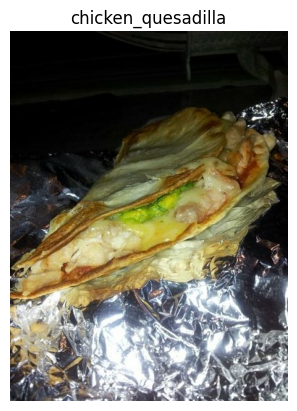

In [28]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_name[label.numpy()])
plt.axis(False)

##Create preprocing funcation for our data

Neural Network perfom better when the data is certain way(e.g batched, normilized)
However not all data (including data from tensorflow dataset) come like this.

However, since we've downloaded the data from TensorFlow Datasets, there are a couple of preprocessing steps we have to take before it's ready to model.

More specifically, our data is currently:
*  In uint8 data type
*  Comprised of all differnet sized tensors (different sized images)
*  Not scaled (the pixel values are between 0 & 255)


Whereas, models like data to be:


*  In float32 data type
*  Have all of the same size tensors (batches require all tensors have the same shape, e.g. (224, 224, 3))
* Scaled (values between 0 & 1), also called normalized


Since we are using EfficientNetBX pretrained model tf.keras.application we dont need to resacale our data (these architure have rescaling bult in )

This mean aur funcation need
1. Reshape our image to all the same image
2. Convert the dtype of our image tensor from unit8 to float 32




In [31]:
 #make funcation for preprcoing image
import tensorflow as tf

def preprcoing_image(image,label,image_shape=224):
  """
  Convert image data type from unit8 -> float32 and reshapes image
  to [img_shape,img_shape,color_channels]
  """
  image = tf.image.resize(image,[image_shape,image_shape]) #reshape the trage image
  image = image/255. #scaling
  return tf.cast(image,tf.float32), label #return (float32_image,label ) tuple

In [32]:
#preprocess single sample image and check the output
preprocessed_image = preprcoing_image(image,label)
print(f"Image before preprocessing :\n {image[:2]}...,\nShape: {image.shape},\n {image.dtype}")
print(f"Image after preprocessing :\n {preprocessed_image[0][:2]}...,\nShape: {preprocessed_image[0].shape},\n {preprocessed_image[0].dtype}")

Image before preprocessing :
 [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 7  7  5]
  [11 11  9]
  [14 14 12]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 5  5  3]
  [ 8  8  6]
  [11 11  9]]]...,
Shape: (512, 384, 3),
 <dtype: 'uint8'>
Image after preprocessing :
 [[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.03055213 0.03055213 0.02270899]
  [0.02240896 0.02240896 0.01456583]
  [0.0431372  0.0431372  0.03529407]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.02655059 0.02655059 0.01870745]
  [0.02663072 0.02663072 0.01878758]
  [0.03995595 0.03995595 0.03211281]]]...,
Shape: (224, 224, 3),
 <dtype: 'float32'>


##Batch & prepare datasets
Before we can model our data, we have to turn it into batches.

Why?

Because computing on batches is memory efficient.

We turn our data from 101,000 image tensors and labels (train and test combined) into batches of 32 image and label pairs, thus enabling it to fit into the memory of our GPU.


We are going to make our data input pipline run really fast.


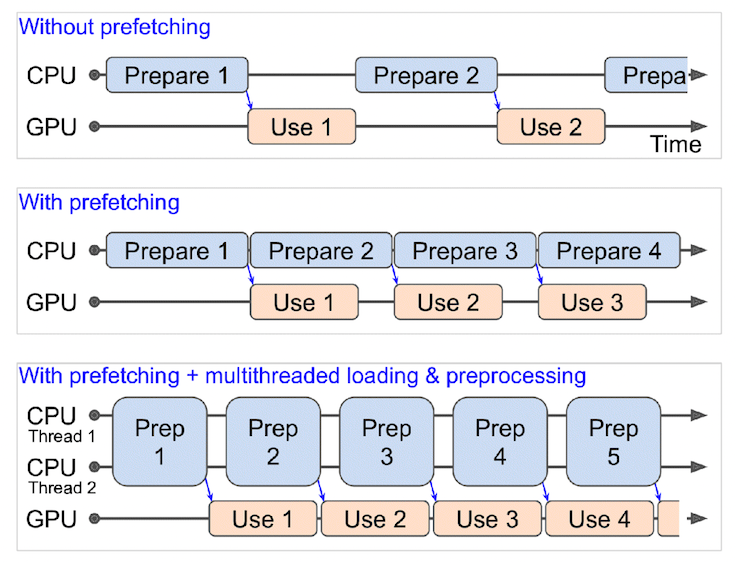

In [34]:
#Map preprocessing funcations to training
train_data = train_data.map(map_func = preprcoing_image, num_parallel_calls=tf.data.AUTOTUNE)
#Shuffle train data in turn into batches
train_data = train_data.shuffle(buffer_size=100).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)


# map preprocessing for test data
test_data  = test_data.map(preprcoing_image,num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [35]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)